In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
# reading the training data set
df1=pd.read_csv('malignant_train.csv')

In [3]:
# reading the test data set
df2=pd.read_csv('malignant_test.csv')

In [4]:
# glimpse of the training data set
df1.head(5)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
# Glimpse fo the testing data set
df2.head(5)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [7]:
# find the number of rows  an columns in training and testing data set
print('train shape=',df1.shape)
print('test shape=',df2.shape)

train shape= (159571, 8)
test shape= (153164, 2)


### Exploratory Data Analysis (EDA)

In [8]:
# find out the basic information about the trainingdata set
print('train data set descripton:',df1.describe())

train data set descripton:            malignant  highly_malignant           rude         threat  \
count  159571.000000     159571.000000  159571.000000  159571.000000   
mean        0.095844          0.009996       0.052948       0.002996   
std         0.294379          0.099477       0.223931       0.054650   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.000000          0.000000       0.000000       0.000000   
50%         0.000000          0.000000       0.000000       0.000000   
75%         0.000000          0.000000       0.000000       0.000000   
max         1.000000          1.000000       1.000000       1.000000   

               abuse         loathe  
count  159571.000000  159571.000000  
mean        0.049364       0.008805  
std         0.216627       0.093420  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000

In [9]:
# finding out the basic information about the testing data set
print('test data set description:',df2.describe())

test data set description:                       id                                       comment_text
count             153164                                             153164
unique            153164                                             153164
top     00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
freq                   1                                                  1


id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64
AxesSubplot(0.125,0.125;0.62x0.755)


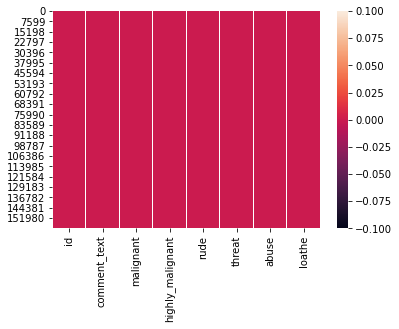

In [10]:
# Checking the null values

print(df1.isnull().sum())
print(sns.heatmap(df1.isnull()))

                  malignant  highly_malignant      rude    threat     abuse  \
malignant          1.000000          0.308619  0.676515  0.157058  0.647518   
highly_malignant   0.308619          1.000000  0.403014  0.123601  0.375807   
rude               0.676515          0.403014  1.000000  0.141179  0.741272   
threat             0.157058          0.123601  0.141179  1.000000  0.150022   
abuse              0.647518          0.375807  0.741272  0.150022  1.000000   
loathe             0.266009          0.201600  0.286867  0.115128  0.337736   

                    loathe  
malignant         0.266009  
highly_malignant  0.201600  
rude              0.286867  
threat            0.115128  
abuse             0.337736  
loathe            1.000000  
AxesSubplot(0.125,0.125;0.62x0.755)


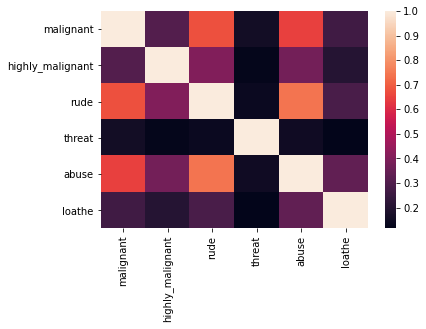

In [11]:
# Checking correlation in the data set with the help of heat map

print(df1.corr())
print(sns.heatmap(df1.corr()))

In [12]:
# checkinng the skewness in the features
df1.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

malignant


0    144277
1     15294
Name: malignant, dtype: int64


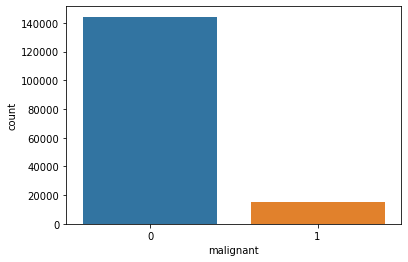

highly_malignant


0    157976
1      1595
Name: highly_malignant, dtype: int64


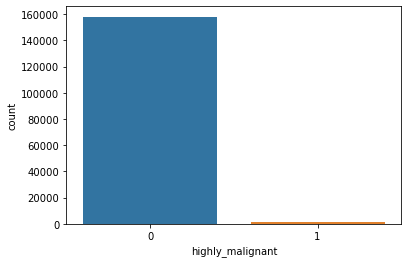

rude


0    151122
1      8449
Name: rude, dtype: int64


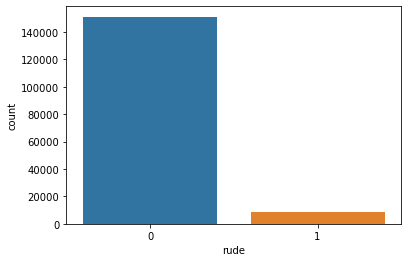

threat


0    159093
1       478
Name: threat, dtype: int64


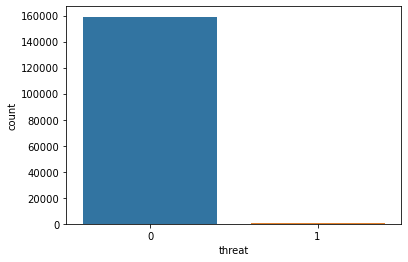

abuse


0    151694
1      7877
Name: abuse, dtype: int64


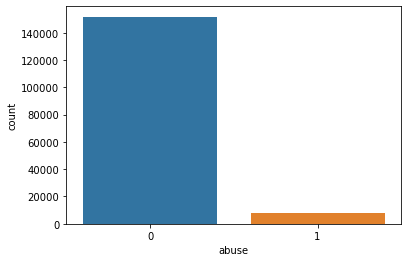

loathe


0    158166
1      1405
Name: loathe, dtype: int64


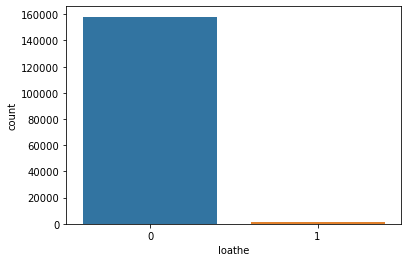

In [14]:
# Checking the type of the comment in the columns: count of '0' & '1': by visualisation

col=['malignant','highly_malignant','rude','threat','abuse','loathe']

for i in col:
    print(i)
    print('\n')
    print(df1[i].value_counts())
    sns.countplot(df1[i])
    plt.show()
    

### Data Preprocessing

In [18]:
# importing necessary libraries
import nltk
import string

from nltk.stem import WordNetLemmatizer

from nltk.corpus import stopwords


In [20]:
# creating a new column for the length of the strings(comments)

df1['length']=df1['comment_text'].str.len()
df1.head(5)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


In [21]:
# converting all the messages to lower case

df1['comment_text']=df1['comment_text'].str.lower()

In [22]:
# Replacing email addresses with 'email'

df1['comment_text'] = df1['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

In [23]:
# Replacing URLs with 'webaddress'

df1['comment_text'] = df1['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

In [24]:
# Replacing money symbols with 'moneysymb' (£ can by typed with ALT key + 156)

df1['comment_text'] = df1['comment_text'].str.replace(r'£|\$', 'dollers')

In [25]:
# Replacing 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'

df1['comment_text'] = df1['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

In [26]:
# Replacing numbers with 'numbr'

df1['comment_text'] = df1['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [27]:
# joining the strings

df1['comment_text'] = df1['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))

In [29]:
# updating the list of stop words

nltk.download('stopwords')

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
df1['comment_text'] = df1['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ronav\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [31]:
# stemming and lemmatization

nltk.download('wordnet')

lem=WordNetLemmatizer()
df1['comment_text'] = df1['comment_text'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ronav\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [32]:
# adding the column as clean_length to know the clean length of the strings(comment_text)

df1['clean_length']=df1.comment_text.str.len()
df1.head(5)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,180
1,000103f0d9cfb60f,d'aww! match background colour i'm seemingly s...,0,0,0,0,0,0,112,111
2,000113f07ec002fd,"hey man, i'm really trying edit war. guy const...",0,0,0,0,0,0,233,149
3,0001b41b1c6bb37e,can't make real suggestion improvement wondere...,0,0,0,0,0,0,622,397
4,0001d958c54c6e35,"you, sir, hero. chance remember page that's on?",0,0,0,0,0,0,67,47


In [33]:
# Total length removal

print('Original Length=',df1.length.sum())
print('Clean Length=',df1.clean_length.sum())

Original Length= 62893130
Clean Length= 43575187


In [37]:
# installing wordcloud for further analysis

conda install -c conda-forge wordcloud=1.6.0 

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2020.10.14-0
  - defaults/win-64::ca-certificates-2020.10.14-0done

## Package Plan ##

  environment location: C:\Users\Ronav\anaconda3

  added / updated specs:
    - wordcloud=1.6.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.11.0               |   py38haa244fe_1        1012 KB  conda-forge
    openssl-1.1.1h             |       he774522_0         5.8 MB  conda-forge
    python_abi-3.8             |           2_cp38           4 KB  conda-forge
    wordcloud-1.6.0            |   py38hfa6e2cd_0         189 KB  conda-forge
    ------------------------------------------------------------
                                           Total:    

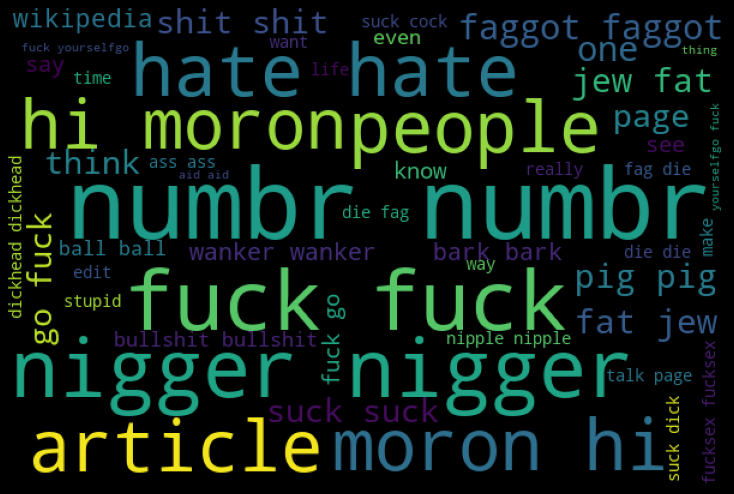

In [38]:
#Getting sense of loud words which are offensive

from wordcloud import WordCloud

hams = df1['comment_text'][df1['malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

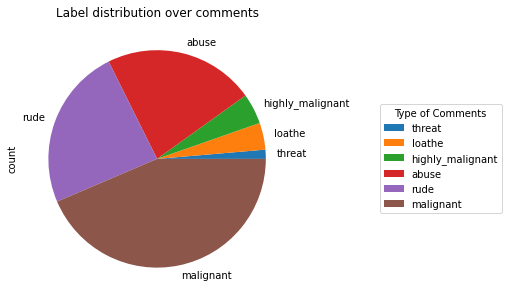

In [44]:
# Ploting labels count with the help of pie chart

cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = df1[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',title='Label distribution over comments',
                         figsize=(5, 5))\
                        .legend(loc='center left', bbox_to_anchor=(1.3, 0.5),title='Type of Comments')

In [45]:
target_data = df1[cols_target]

df1['bad'] =df1[cols_target].sum(axis =1)
print(df1['bad'].value_counts())
df1['bad'] = df1['bad'] > 0 
df1['bad'] = df1['bad'].astype(int)
print(df1['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


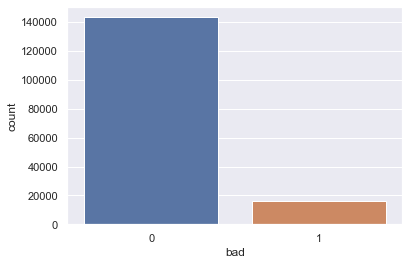

In [46]:
sns.set()
sns.countplot(x="bad" , data = df1)
plt.show()

In [47]:
#  Convert text into vectors using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(df1['comment_text'])
x = features

In [50]:
print('Training data shape:',df1.shape)
print('Testing data shape:',df2.shape)

Training data shape: (159571, 11)
Testing data shape: (153164, 2)


### Splitting the data set into training and test data 

In [39]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB


from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc,f1_score

In [51]:
y=df1['bad']


In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.30)

In [53]:
print('shape of training features data:',x_train.shape)
print('shape of testing features data:',x_test.shape)
print('shape of training o/p variable data:',y_train.shape)
print('shape of testing o/p variable data:',y_test.shape)

shape of training features data: (111699, 10000)
shape of testing features data: (47872, 10000)
shape of training o/p variable data: (111699,)
shape of testing o/p variable data: (47872,)


### Model building

In [54]:
# LogisticRegression
LG = LogisticRegression(C=1, max_iter = 3000)

LG.fit(x_train, y_train)

y_pred_train = LG.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = LG.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9595520103134316
Test accuracy is 0.9552974598930482
[[42729   221]
 [ 1919  3003]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.93      0.61      0.74      4922

    accuracy                           0.96     47872
   macro avg       0.94      0.80      0.86     47872
weighted avg       0.95      0.96      0.95     47872



In [55]:
# DecisionTreeClassifier
DT = DecisionTreeClassifier()

DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = DT.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9988898736783678
Test accuracy is 0.939254679144385
[[41597  1353]
 [ 1555  3367]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     42950
           1       0.71      0.68      0.70      4922

    accuracy                           0.94     47872
   macro avg       0.84      0.83      0.83     47872
weighted avg       0.94      0.94      0.94     47872



In [56]:
#KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
y_pred_train = knn.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = knn.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.922300110117369
Test accuracy is 0.9173629679144385
[[42809   141]
 [ 3815  1107]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     42950
           1       0.89      0.22      0.36      4922

    accuracy                           0.92     47872
   macro avg       0.90      0.61      0.66     47872
weighted avg       0.91      0.92      0.89     47872



In [57]:
#RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9988719684151156
Test accuracy is 0.955276570855615
[[42408   542]
 [ 1599  3323]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.86      0.68      0.76      4922

    accuracy                           0.96     47872
   macro avg       0.91      0.83      0.87     47872
weighted avg       0.95      0.96      0.95     47872



In [58]:
# xgboost
import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(x_train, y_train)
y_pred_train = xgb.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = xgb.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

[14:11:55] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy is 0.9614052050600274
Test accuracy is 0.9526236631016043
[[42689   261]
 [ 2007  2915]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     42950
           1       0.92      0.59      0.72      4922

    accuracy                           0.95     47872
   macro avg       0.94      0.79      0.85     47872
weighted avg       0.95      0.95      0.95     47872



In [59]:
#AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100)
ada.fit(x_train, y_train)
y_pred_train = ada.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = ada.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.951118631321677
Test accuracy is 0.9490307486631016
[[42553   397]
 [ 2043  2879]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     42950
           1       0.88      0.58      0.70      4922

    accuracy                           0.95     47872
   macro avg       0.92      0.79      0.84     47872
weighted avg       0.95      0.95      0.94     47872



### Cross Validation (with the help of AUC-ROC)

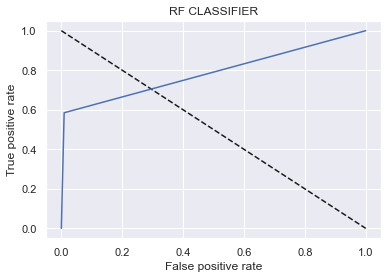

In [60]:
#Plotting the graph which tells us about the area under curve , more the area under curve more will be the better prediction
# model is performing good :
fpr,tpr,thresholds=roc_curve(y_test,y_pred_test)
roc_auc=auc(fpr,tpr)
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'RF Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RF CLASSIFIER')
plt.show()

In [62]:
pip install eli5

In [63]:
import eli5
eli5.show_weights(RF,vec = tf_vec, top = 15)  #random forest
# will give you top 15 features or words  which makes a comment toxic

Weight,Feature
0.0741 ± 0.0574,fuck
0.0385 ± 0.0405,fucking
0.0318 ± 0.0362,shit
0.0206 ± 0.0191,suck
0.0199 ± 0.0123,idiot
0.0176 ± 0.0128,stupid
0.0161 ± 0.0145,asshole
0.0161 ± 0.0181,bitch
0.0120 ± 0.0103,faggot
0.0116 ± 0.0116,dick


### Applying the model on the given test data set

In [64]:
test_data =tf_vec.fit_transform(df2['comment_text'])
test_data

<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2940344 stored elements in Compressed Sparse Row format>

In [65]:
prediction=RF.predict(test_data)
prediction

array([0, 0, 0, ..., 0, 0, 0])

### Saving the Model

In [66]:
import joblib
joblib.dump(RF,"malig.pkl")

['malig.pkl']

### Saving the predicted output file in CSV format 

In [67]:
predicted_values=pd.DataFrame({'Actual':test_data,'Predicted':prediction})

In [68]:
predicted_values

,Actual,Predicted
0,"(0, 826)\t0.12369093740824466\n (0, 1196)\t...",0
1,"(0, 3544)\t0.4529328353864698\n (0, 4445)\t...",0
2,"(0, 811)\t0.9261678546313611\n (0, 8237)\t0...",0
3,"(0, 2227)\t0.20618915148268235\n (0, 3648)\...",0
4,"(0, 652)\t0.8268035384149927\n (0, 794)\t0....",0
...,...,...
153159,"(0, 492)\t0.3924370515724239\n (0, 2286)\t0...",0
153160,"(0, 773)\t0.3077528879606037\n (0, 1149)\t0...",0
153161,"(0, 364)\t0.24460492881138216\n (0, 492)\t0...",0
153162,"(0, 386)\t0.08194774166722044\n (0, 453)\t0...",0


In [69]:
predicted_values.to_csv('test_predicted_values.csv')